#**HANDSON 2**

Nama: Bani Adam Tampubolon

NIM: 121140187

#**NOMOR 1**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Import gambar pada path /content/sample-img-ho2.jpg

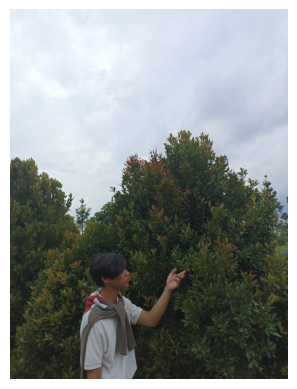

In [2]:
# Load the image
img = cv2.imread('/content/sample-img-ho2.jpg')

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()



*   Lakukan resize untuk foto menjadi 1080 pada dimension terpanjangnya. menggunakan library cv2.resize untuk melakukan resize.



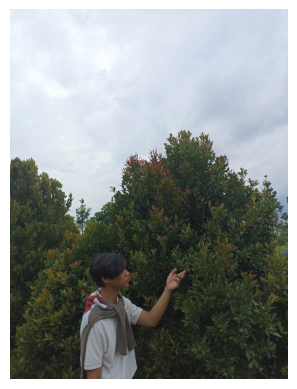

In [3]:
# prompt: Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the original image dimensions
height, width = img.shape[:2]

# Calculate the new dimensions while maintaining aspect ratio
if height > width:
    new_height = 1080
    new_width = int(width * (new_height / height))
else:
    new_width = 1080
    new_height = int(height * (new_width / width))

# Resize the image using cv2.resize
resized_img = cv2.resize(img, (new_width, new_height))

# Convert the resized image from BGR to RGB
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the resized image using matplotlib
plt.imshow(resized_img_rgb)
plt.axis('off')  # Hide axes
plt.show()


* NIM: 121140187

*   Membuat frame berwarna kuning, dalam format RGB: (RGB value: 255, 255, 0) sebesar 25 pixel + 87 pixel (dua NIM terakhir saya) pada setiap sisi foto. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM saya.



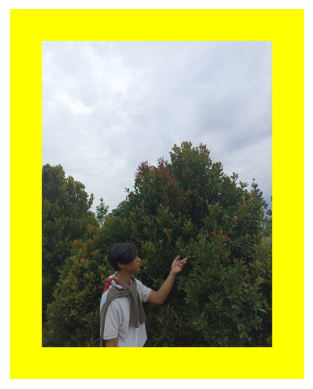

In [5]:

# Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.

# Frame thickness (25 + last two digits of NIM)
frame_thickness = 25 + 87

# Create a new image with a yellow border
border_img = cv2.copyMakeBorder(
    resized_img,
    frame_thickness,
    frame_thickness,
    frame_thickness,
    frame_thickness,
    cv2.BORDER_CONSTANT,
    value=(0, 255, 255)  # Yellow in BGR
)


# Convert the bordered image from BGR to RGB
border_img_rgb = cv2.cvtColor(border_img, cv2.COLOR_BGR2RGB)

# Display the bordered image using matplotlib
plt.imshow(border_img_rgb)
plt.axis('off')  # Hide axes
plt.show()

*   Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin

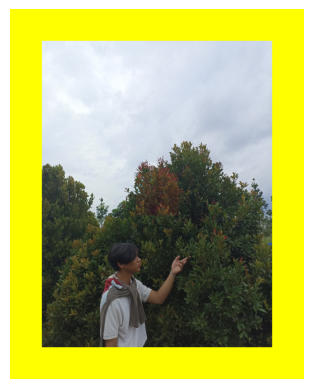

In [6]:
# prompt: Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin

# Assuming 'border_img' is the image with the yellow border from the previous code.

# Split the image into its BGR channels
b, g, r = cv2.split(border_img)

# Increase the intensity of the red channel in the center region
center_height_start = int(border_img.shape[0] * 0.5) - 75
center_height_end = int(border_img.shape[0] * 0.5) + 75
center_width_start = int(border_img.shape[1] * 0.5) - 75
center_width_end = int(border_img.shape[1] * 0.5) + 75

r[center_height_start:center_height_end, center_width_start:center_width_end] = np.clip(
    r[center_height_start:center_height_end, center_width_start:center_width_end] + 20, 0, 255
)

# Merge the modified channels back into an image
modified_img = cv2.merge((b, g, r))

# Convert the modified image from BGR to RGB
modified_img_rgb = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)

# Display the modified image using matplotlib
plt.imshow(modified_img_rgb)
plt.axis('off')  # Hide axes
plt.show()

*   Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin



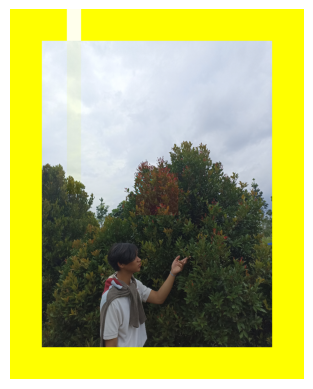

In [9]:
# prompt: lanjutkanlah program sebelumnya dan jangan ubah frame bagian atas: Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin

# Assuming 'modified_img' is the image from the previous code.

# Split the image into its BGR channels
b, g, r = cv2.split(modified_img)

# Decrease the intensity of the blue channel in the upper region
height, width = modified_img.shape[:2]
upper_region_start = 0
upper_region_end = int(height * 0.5)  # Approximately the upper half of the image

b[upper_region_start:upper_region_end, 200:250] = np.clip(
    b[upper_region_start:upper_region_end, 200:250] - 20, 0, 255
)

# Merge the modified channels back into an image
modified_img_2 = cv2.merge((b, g, r))

# Convert the modified image from BGR to RGB
modified_img_2_rgb = cv2.cvtColor(modified_img_2, cv2.COLOR_BGR2RGB)

# Display the modified image using matplotlib
plt.imshow(modified_img_2_rgb)
plt.axis('off')  # Hide axes
plt.show()

* Tampilkanlah histogram dari foto tersebut

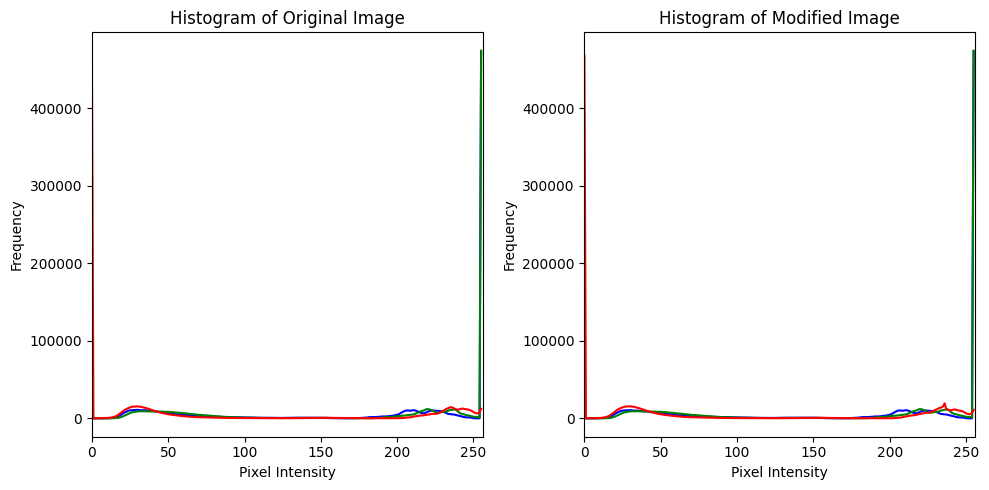

In [10]:
# prompt:  buat histogram antara gambar awal (border_img_rgb), dan gambar terakhir yang telah di edit (modified_img_2_rgb)

# Calculate and plot the histogram for the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Histogram of Original Image')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([border_img_rgb], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


# Calculate and plot the histogram for the modified image
plt.subplot(1, 2, 2)
plt.title('Histogram of Modified Image')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([modified_img_2_rgb], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

#**Penjelasan dan Kesimpulan Percobaan Nomor 1:**

## **A. Penjelasan Langkah Percobaan**


### Langkah 1: Import dan Tampilkan Gambar

- Kode ini mengimpor gambar (`/content/sample-img-ho2.jpg`) menggunakan OpenCV (cv2).
- Gambar yang diimpor oleh OpenCV awalnya dalam format warna BGR (Blue, Green, Red) dan kemudian dikonversi ke RGB (Red, Green, Blue) agar tampilannya benar di Matplotlib.
- `plt.imshow` menampilkan gambar, dan `plt.axis('off')` menghilangkan sumbu untuk tampilan yang lebih bersih.

### Langkah 2: Resize Gambar

- Kode menghitung rasio aspek gambar agar saat di-resize, proporsinya tetap terjaga.
- Ukuran gambar diubah sehingga panjang sisi terpanjang (tinggi atau lebar) menjadi 1080 piksel, dengan menjaga rasio aspek.
- `cv2.resize` menjalankan operasi resize, lalu gambar hasil resize ditampilkan dengan Matplotlib.

### Langkah 3: Tambahkan Border Kuning

- Border berwarna kuning (RGB: 255, 255, 0) ditambahkan di sekitar gambar hasil resize.
- Ketebalan border dihitung sebesar 25 piksel + 87 (dari dua digit terakhir NIM).
- Fungsi `cv2.copyMakeBorder` membuat gambar baru dengan border, dan `cv2.BORDER_CONSTANT` memastikan warna border tetap, bukan hasil pantulan atau pengulangan tepi.
- Gambar dengan border kemudian ditampilkan.

### Langkah 4: Tingkatkan Intensitas Channel Merah di Tengah

- Gambar dipecah menjadi channel warna individual (B, G, R).
- Bagian tengah gambar (sekitar 50-150 piksel dari pusat) diidentifikasi.
- Intensitas channel merah pada area ini dinaikkan sebesar 20 unit.
- Fungsi `np.clip` memastikan nilai channel merah tetap dalam rentang valid 0-255.
- Gambar hasil modifikasi ditampilkan.

### Langkah 5: Kurangi Intensitas Channel Biru di Bagian Atas

- Kode mengidentifikasi bagian atas gambar.
- Intensitas channel biru di area ini dikurangi 20 unit.
- `np.clip` memastikan nilai channel biru tetap valid.
- Gambar hasil modifikasi baru kemudian ditampilkan.

### Langkah 6: Tampilkan Histogram

- Kode menghitung histogram dari gambar asli dengan border dan gambar hasil modifikasi.
- Histogram menunjukkan distribusi intensitas piksel untuk setiap channel warna (merah, hijau, biru) dalam gambar.
- Dengan membandingkan histogram gambar asli dan hasil modifikasi, kita bisa melihat perubahan distribusi warna.

### Penjelasan & Kesimpulan

Eksperimen ini menunjukkan bagaimana OpenCV bisa digunakan untuk memanipulasi gambar dengan berbagai cara:

1. **Resize:** Mengatur dimensi gambar sambil menjaga rasio aspek.
2. **Tambah Border:** Membuat bingkai dengan warna dan ketebalan tertentu di sekitar gambar.
3. **Manipulasi Channel:** Meningkatkan atau menurunkan intensitas channel warna tertentu pada bagian gambar.
4. **Analisis Histogram:** Melihat distribusi intensitas piksel dan visualisasi perubahan keseimbangan warna pada gambar.

Eksperimen ini secara efektif menunjukkan cara-cara pemrosesan gambar untuk memodifikasi, memperbaiki, dan menganalisis gambar menggunakan OpenCV. Langkah-langkah kode ini mendemonstrasikan fungsi-fungsi inti OpenCV untuk manipulasi dan analisis gambar.


## **B. Analisis Hasil Percobaan**

Kode ini menghasilkan dua histogram: satu untuk gambar asli dengan border kuning, dan satu lagi untuk gambar yang telah dimodifikasi di mana saluran merah (red channel) di bagian tengah ditingkatkan, serta saluran biru (blue channel) di bagian atas dikurangi.

Dengan membandingkan histogram-histogram ini, kita bisa melihat beberapa hal berikut:

1. **Saluran Merah (Red Channel):**
   - Histogram gambar yang telah dimodifikasi kemungkinan akan menunjukkan pergeseran ke arah nilai intensitas yang lebih tinggi pada saluran merah, khususnya pada area di mana intensitas merah ditingkatkan (sekitar bagian tengah). Ini berarti puncak histogram saluran merah akan bergeser sedikit ke kanan (nilai intensitas yang lebih tinggi).

2. **Saluran Biru (Blue Channel):**
   - Histogram gambar yang telah dimodifikasi mungkin menunjukkan pergeseran ke arah nilai intensitas yang lebih rendah pada saluran biru, terutama pada rentang intensitas yang sesuai dengan bagian atas gambar, di mana intensitas biru dikurangi. Puncak histogram saluran biru mungkin sedikit bergeser ke kiri (nilai intensitas yang lebih rendah).

3. **Saluran Lainnya:**
   - Histogram saluran hijau (green channel) mungkin tidak banyak berubah karena tidak dimanipulasi langsung dalam kode.
   - Bentuk keseluruhan histogram mungkin sedikit berubah karena adanya penambahan border dan modifikasi lainnya.

Pada dasarnya, perbandingan histogram membantu kita untuk melihat pengaruh dari perubahan saluran warna pada gambar. Ini memberikan cara kuantitatif untuk menilai bagaimana distribusi intensitas warna telah berubah setelah modifikasi.

## Kesimpulan

Perbandingan histogram menunjukkan bagaimana perubahan nilai intensitas piksel dalam wilayah dan saluran tertentu memengaruhi distribusi warna keseluruhan dari gambar. Dengan menganalisis histogram, kita bisa mendapatkan wawasan tentang efek dari manipulasi seperti penyesuaian kecerahan dan warna, yang penting untuk tugas seperti peningkatan gambar dan analisis.


#**NOMOR 2**

Pada percobaan nomor 2 secara keseluruhan merupakan percobaan merubah gambar dari format RGB (Red, Blue, dan Green) menjadi Grayscale.



*   Convert image dari RGB menjadi Grayscale



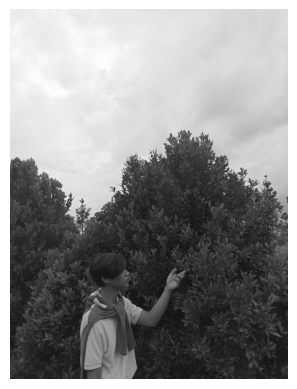

In [11]:
# prompt: Convert image sample-img-ho2.jpg dari RGB menjadi Grayscale

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()



*   Menampilkan histogram dari foto tersebut



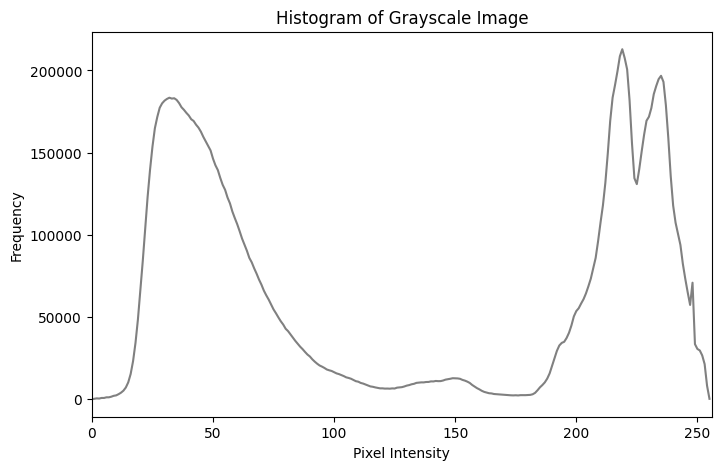

In [12]:
# prompt: Tampilkan histogram dari foto grayscale tersebut

# Calculate and plot the histogram for the grayscale image
plt.figure(figsize=(8, 5))
plt.title('Histogram of Grayscale Image')
histr = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(histr, color='gray')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

* Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255



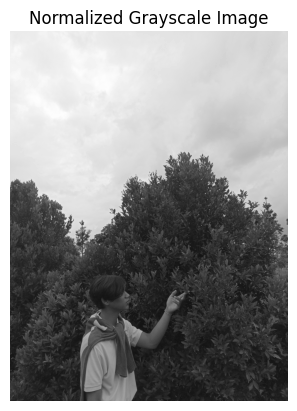

In [14]:
# prompt: Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255

# Normalize the grayscale image
normalized_img = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX)

# Display the normalized grayscale image using matplotlib
plt.title('Normalized Grayscale Image')
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()



* Menampilkan histogram dari hasil normalisasi

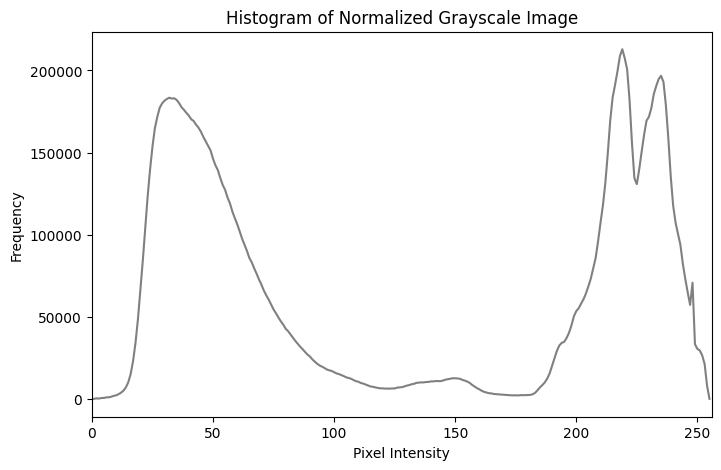

In [15]:
# Calculate and plot the histogram for the normalized grayscale image
plt.figure(figsize=(8, 5))
plt.title('Histogram of Normalized Grayscale Image')
histr = cv2.calcHist([normalized_img], [0], None, [256], [0, 256])
plt.plot(histr, color='gray')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

* Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

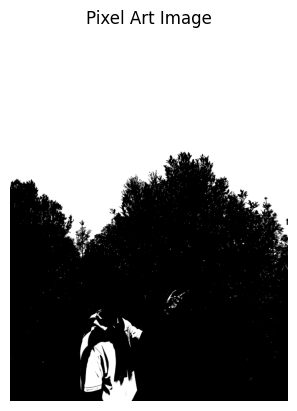

In [16]:
# prompt: Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

# Assuming 'normalized_img' is the normalized grayscale image from the previous code.

# Create a copy of the normalized image to avoid modifying the original
pixel_art_img = normalized_img.copy()

# Apply thresholding to create the pixel art effect
pixel_art_img[pixel_art_img < 128] = 0
pixel_art_img[pixel_art_img >= 128] = 255

# Display the pixel art image using matplotlib
plt.imshow(pixel_art_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Pixel Art Image')
plt.show()

## **HASIL**

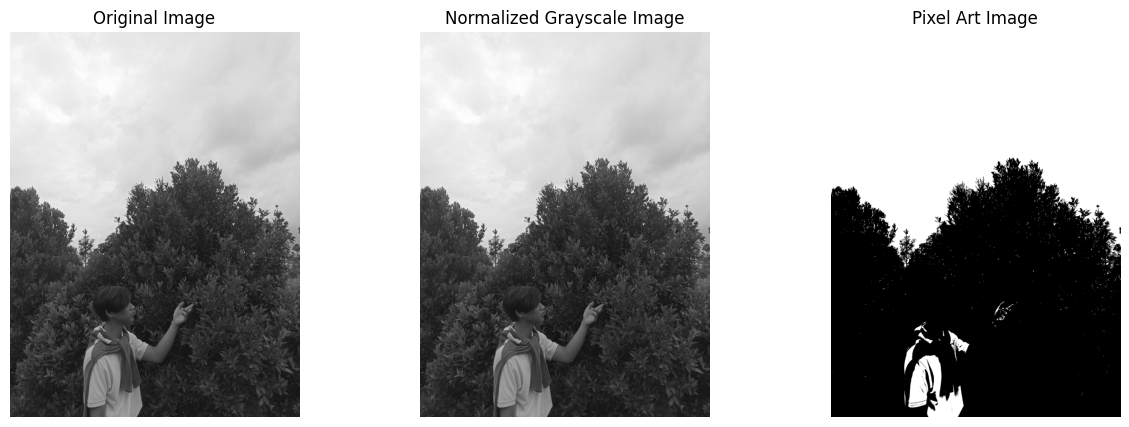

In [22]:
plt.figure(figsize=(15, 5))

# Display the grayscale image using matplotlib
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Hide axes

# Display the normalized grayscale image using matplotlib
plt.subplot(1, 3, 2)
plt.title('Normalized Grayscale Image')
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')  # Hide axes

# Display the pixel art image using matplotlib
plt.subplot(1, 3, 3)
plt.title('Pixel Art Image')
plt.imshow(pixel_art_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Pixel Art Image')

plt.show()

#**NOMOR 3**
Pada aktifitas nomor tiga ini kita akan bermain dengan kecerahan, saturasi, dan kontras pada gambar tersebut.

* **Naikkan kecerahan (brightnes) pada foto tersebut. Namun tidak boleh menggunakan library cv2 untuk menaikkan kecerahan. hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut.**

In [40]:
from PIL import Image
import numpy as np

# Load the image
image_path = '/content/sample-img-ho2.jpg'
image = Image.open(image_path)

# Convert image to NumPy array
image_array = np.array(image)

# Define the brightness factor (e.g., 0-100 for a noticeable increase)
brightness_increase = 28

# Increase brightness by adding the constant value and clipping to avoid overflow
brightened_image_array = np.clip(image_array + brightness_increase, 0, 255).astype(np.uint8)

# Convert back to PIL Image
brightened_image = Image.fromarray(brightened_image_array)

# Display the brightened image
brightened_image.show()



Menampilkan Foto dan Histogram

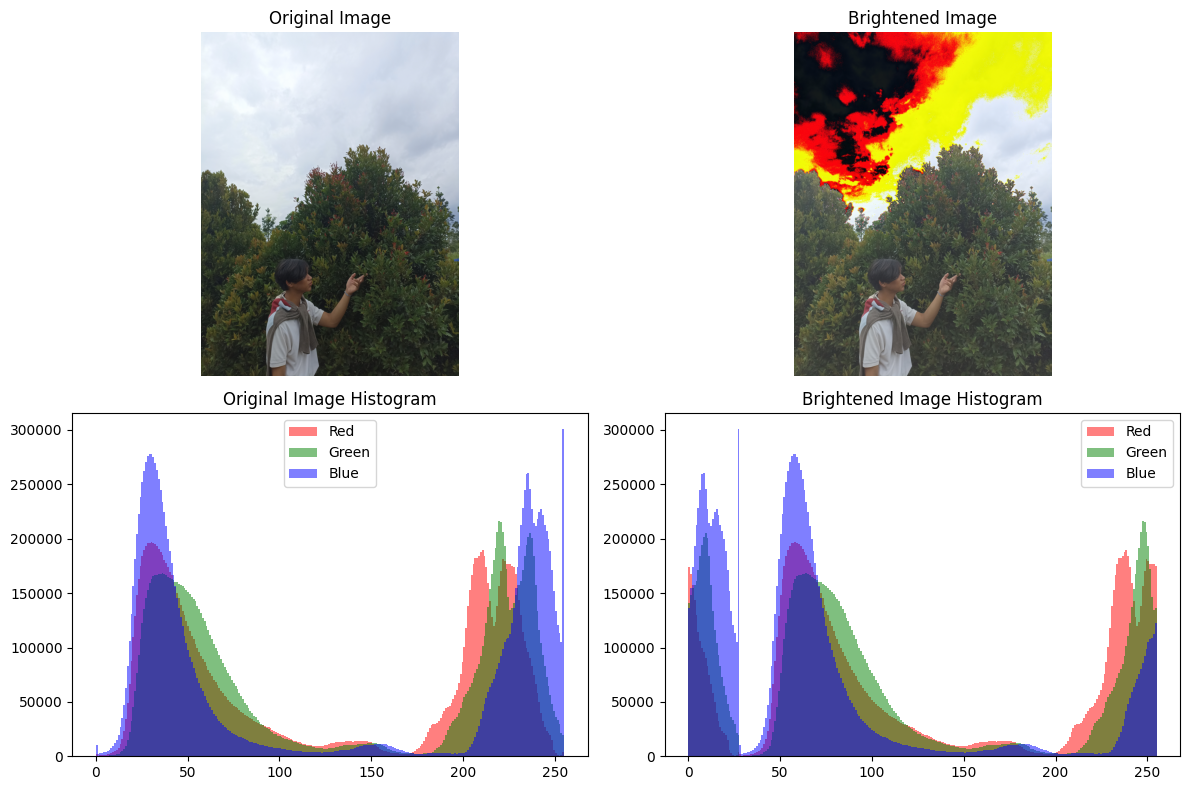

In [41]:
# Display the original and brightened images
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Display Original Image
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display Brightened Image
axs[0, 1].imshow(brightened_image)
axs[0, 1].set_title("Brightened Image")
axs[0, 1].axis('off')

# Display Histogram for Original Image
axs[1, 0].set_title("Original Image Histogram")
axs[1, 0].hist(image_array[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
axs[1, 0].hist(image_array[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
axs[1, 0].hist(image_array[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axs[1, 0].legend()

# Display Histogram for Brightened Image
axs[1, 1].set_title("Brightened Image Histogram")
axs[1, 1].hist(brightened_image_array[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
axs[1, 1].hist(brightened_image_array[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
axs[1, 1].hist(brightened_image_array[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

## Penjelasan Kode
- `brightness_increase`: Menentukan seberapa besar kecerahan akan ditambah (semakin besar nilainya, semakin terang gambar). Pada kasus ini saya menggunakan nilai 28.

- `np.clip`: Menggunakan fungsi clip untuk memastikan nilai piksel tetap dalam rentang 0–255, sehingga mencegah overflow.


## Penjelasan Hasil
- Setelah dilakukan peningkatan kecerahan semua warna pada gambar terlihat meningkatkan kecerahannya.

- Pada histogram juga terlihat bahwa persebaran warna yang terjadi pada gambar berubah seiring dengan jumlah kuantitas peningkatan kecerahan yang di setel pada program `brightness_increase`. Pada kasus ini saya menggunakan nilai 28.

- Pada langit, langit berubah menjadi kuning, jingga, kemerahan, dan hitam saat kecerahan ditingkatkan, hal ini terjadi karena pada "gambar sebelum ditingkatkan" langit telah memiliki warna yang cenderung putih, dan saat ditingkatkan warna putih yang notabennya tergolong "terang" akan berubah menjadi kuning, jingga, merah, dan kehitaman. Hal ini juga terlihat pada histogram yang dimana persebaran warna biru yang dominan terdapat pada langit, menjadi berkurang dan berubah menjadi kuning, dan merah.



---


* **Turunkan saturasi warna pada foto tersebut. Namun tidak boleh menggunakan library cv2 untuk menurunkan saturasi warna. Hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut**

In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/sample-img-ho2.jpg'
image = Image.open(image_path)

# Convert image to NumPy array
image_array = np.array(image)

# Convert the image to grayscale
grayscale_image = np.dot(image_array[..., :3], [0.2989, 0.587, 0.114])

# Reshape grayscale image to have same dimensions as original
grayscale_image = np.stack((grayscale_image,) * 3, axis=-1)

# Define saturation reduction factor (0.5 = 50% desaturation)
desaturation_factor = 0.5

# Desaturate the image
desaturated_image_array = (image_array * (1 - desaturation_factor) + grayscale_image * desaturation_factor).astype(np.uint8)

# Convert back to PIL Image
desaturated_image = Image.fromarray(desaturated_image_array)

Menampilkan Foto dan Histogram

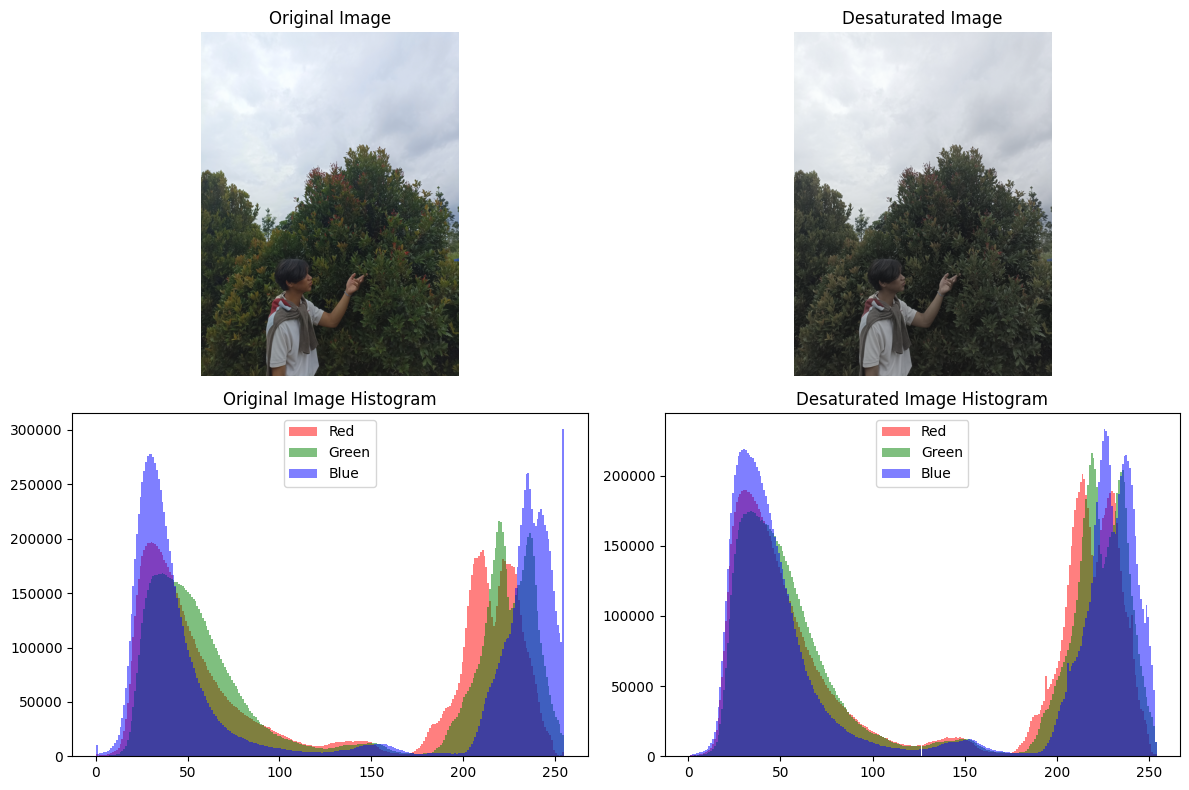

In [47]:
# Display the original and desaturated images
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Display Original Image
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display Desaturated Image
axs[0, 1].imshow(desaturated_image)
axs[0, 1].set_title("Desaturated Image")
axs[0, 1].axis('off')

# Display Histogram for Original Image
axs[1, 0].set_title("Original Image Histogram")
axs[1, 0].hist(image_array[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
axs[1, 0].hist(image_array[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
axs[1, 0].hist(image_array[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axs[1, 0].legend()

# Display Histogram for Desaturated Image
axs[1, 1].set_title("Desaturated Image Histogram")
axs[1, 1].hist(desaturated_image_array[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
axs[1, 1].hist(desaturated_image_array[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
axs[1, 1].hist(desaturated_image_array[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

## Penjelasan Kode
- Grayscale Konversi: Gambar dikonversi ke grayscale dengan menggunakan rumus `0.2989 * R + 0.587 * G + 0.114 * B `, yang mempertimbangkan persepsi manusia terhadap intensitas warna.

- Penggabungan dengan Faktor Desaturasi: Dengan menggunakan `desaturation_factor`, kita mengontrol intensitas dari grayscale (pada faktor 0.5, gambar setengah berwarna dan setengah grayscale).

- Histogram: Histogram menunjukkan distribusi intensitas warna merah, hijau, dan biru. Histogram gambar yang telah desaturasi cenderung memiliki distribusi yang lebih terpusat.

## Penjelasan Hasil
- Gambar hasil desaturasi/saturasi yang diturunkan akan tampak memiliki saturasi warna yang berkurang, atau warna lebih terlihat lebih ke abu-abuan dan histogram menunjukkan bagaimana intensitas tiap warna lebih merata, mencerminkan perubahan saturasi.

---

* **Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut**

In [48]:
# Load the image
image_path = '/content/sample-img-ho2.jpg'
image = Image.open(image_path)

# Convert image to NumPy array
image_array = np.array(image)

# Calculate the mean intensity value for each color channel
mean_intensity = np.mean(image_array, axis=(0, 1))

# Define contrast reduction factor (e.g., 0.5 for reducing contrast by 50%)
contrast_factor = 0.5

# Apply contrast reduction
reduced_contrast_image_array = (contrast_factor * image_array + (1 - contrast_factor) * mean_intensity).astype(np.uint8)

# Convert back to PIL Image
reduced_contrast_image = Image.fromarray(reduced_contrast_image_array)

Menampilkan Gambar dan Histogram

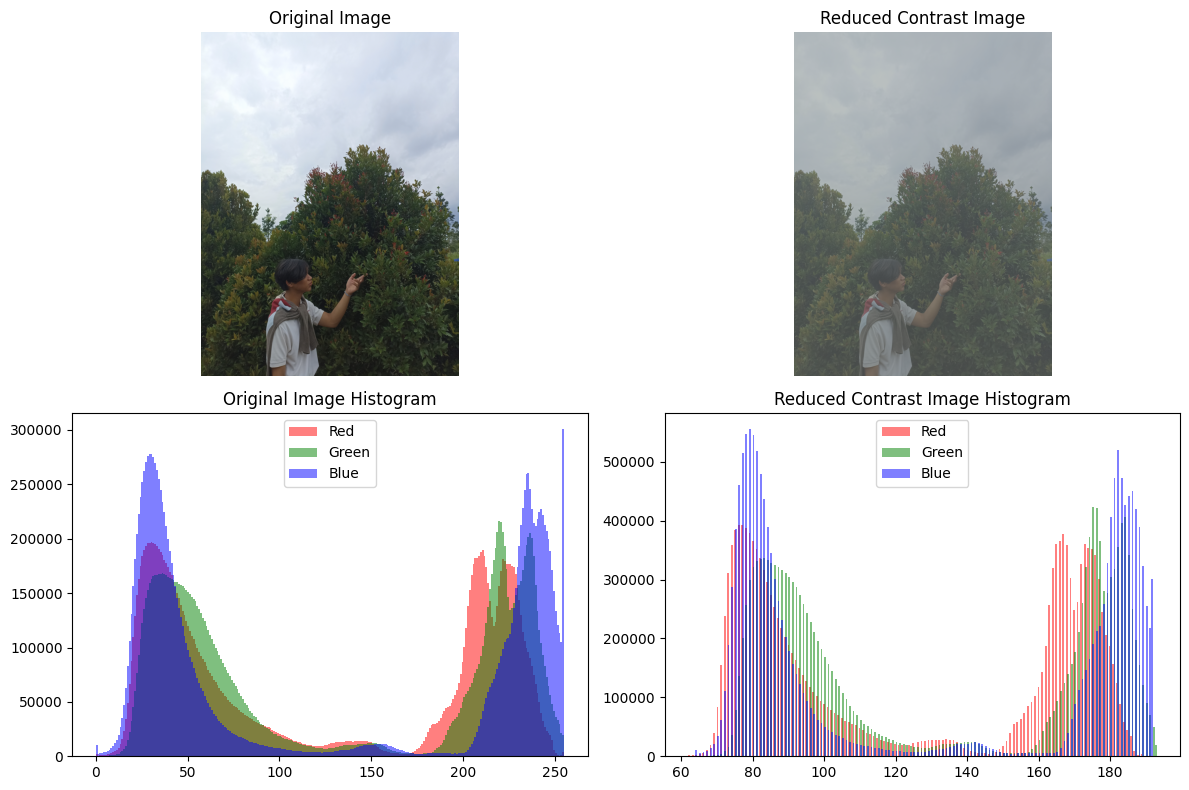

In [49]:
# Display the original and reduced-contrast images
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Display Original Image
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Display Reduced Contrast Image
axs[0, 1].imshow(reduced_contrast_image)
axs[0, 1].set_title("Reduced Contrast Image")
axs[0, 1].axis('off')

# Display Histogram for Original Image
axs[1, 0].set_title("Original Image Histogram")
axs[1, 0].hist(image_array[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
axs[1, 0].hist(image_array[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
axs[1, 0].hist(image_array[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axs[1, 0].legend()

# Display Histogram for Reduced Contrast Image
axs[1, 1].set_title("Reduced Contrast Image Histogram")
axs[1, 1].hist(reduced_contrast_image_array[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
axs[1, 1].hist(reduced_contrast_image_array[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
axs[1, 1].hist(reduced_contrast_image_array[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

## Penjelasan Kode
- Nilai Rata-rata Intensitas: `mean_intensity` dihitung untuk setiap saluran warna untuk menjadi titik tengah intensitas yang akan dituju ketika menurunkan kontras.

- Transformasi Kontras: Setiap piksel digeser menuju nilai rata-rata sesuai dengan `contrast_factor` yang lebih kecil dari 1. Semakin kecil `contrast_factor`, semakin dekat nilai piksel menuju rata-rata, sehingga kontras semakin berkurang. Dalam kasus ini saya menggunakan nilai `contrast_factor` sebesar 0.5. Hal ini menandakan saya melakukan 50% pergeseran kontras, yang dimana semakin tinggi nilainya pergeseran kontras juga akan semakin tinggi.

- Histogram: Histogram gambar setelah penurunan kontras menunjukkan distribusi intensitas yang lebih sempit, mencerminkan kontras yang lebih rendah.

## Penjelasan Hasil
- Gambar yang dihasilkan memiliki kontras lebih rendah, dan histogram menunjukkan bahwa distribusi intensitas piksel lebih terpusat, sesuai dengan penurunan kontras yang dilakukan.